<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Aula_28_PROYECTO_BASICO_19_EN_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import drive
import numpy as np
import pickle

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo data_batch_1
data_directory = '/content/drive/MyDrive/druida/cifar-10/data_batch_1'

# Cargar el conjunto de datos CIFAR-10 desde la ubicación en Google Drive
with open(data_directory, 'rb') as file:
    cifar_data = pickle.load(file, encoding='bytes')

# Normalizar los valores de píxeles al rango [0, 1]
x_train, x_test = cifar_data[b'data'] / 255.0, cifar_data[b'data'] / 255.0
y_train, y_test = np.array(cifar_data[b'labels']), np.array(cifar_data[b'labels'])  # Convertir a numpy array

# Reformatear los datos para que coincidan con las expectativas del modelo
x_train = x_train.reshape((len(x_train), 32, 32, 3))
x_test = x_test.reshape((len(x_test), 32, 32, 3))

# Definir el modelo de red convolucional
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=10)

# Evaluar el modelo en el conjunto de
# Guardar el modelo entrenado
model.save('/content/drive/MyDrive/druida/cifar-10/Mi_Modulo_Hilario.h5')

In [12]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from google.colab import drive
import numpy as np
import pickle

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo data_batch_1
data_directory = '/content/drive/MyDrive/druida/cifar-10/data_batch_1'

# Cargar el conjunto de datos CIFAR-10 desde la ubicación en Google Drive
with open(data_directory, 'rb') as file:
    cifar_data = pickle.load(file, encoding='bytes')

# Normalizar los valores de píxeles al rango [0, 1]
x_test = cifar_data[b'data'] / 255.0
y_test = np.array(cifar_data[b'labels'])

# Reformatear los datos para que coincidan con las expectativas del modelo
x_test = x_test.reshape((len(x_test), 32, 32, 3))

# Cargar el modelo entrenado
loaded_model = load_model('/content/drive/MyDrive/druida/cifar-10/Mi_Modulo_Hilario.h5')

# Realizar predicciones en el conjunto de prueba
predictions = loaded_model.predict(x_test)

# Convertir las probabilidades a etiquetas predichas
predicted_labels = np.argmax(predictions, axis=1)

# Evaluar la precisión en el conjunto de prueba
accuracy = np.mean(predicted_labels == y_test)
print(f'Accuracy on test set: {accuracy}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
313/313 [==============================] - 4s 13ms/step
Accuracy on test set: 0.8106


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
313/313 [==============================] - 18s 52ms/step - loss: 2.1558 - accuracy: 0.1956
Epoch 2/10
313/313 [==============================] - 16s 52ms/step - loss: 1.9852 - accuracy: 0.2614
Epoch 3/10
313/313 [==============================] - 17s 55ms/step - loss: 1.9268 - accuracy: 0.2942
Epoch 4/10
313/313 [==============================] - 17s 54ms/step - loss: 1.8855 - accuracy: 0.3056
Epoch 5/10
313/313 [==============================] - 17s 53ms/step - loss: 1.8809 - accuracy: 0.3185
Epoch 6/10
313/313 [==============================] - 18s 58ms/step - loss: 1.8543 - accuracy: 0.3101
Epoch 7/10
313/313 [==============================] - 16s 53ms/step - loss: 1.8357 - accuracy: 0.3240
Epoch 8/10
313/313 [==============================] - 17s 53ms/step - loss: 1.8304 - accuracy: 0.3298
Epoch 9/10
313/313 [==============================] - 1

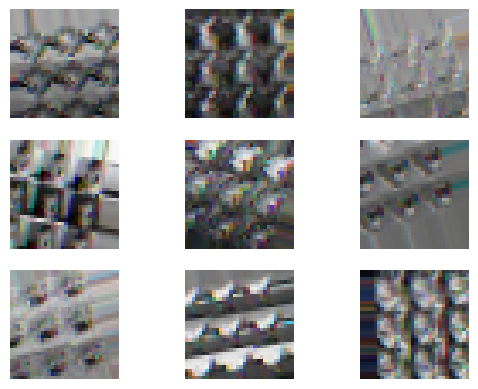

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import numpy as np
import pickle

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo data_batch_1
data_directory = '/content/drive/MyDrive/druida/cifar-10/data_batch_1'

# Cargar el conjunto de datos CIFAR-10 desde la ubicación en Google Drive
with open(data_directory, 'rb') as file:
    cifar_data = pickle.load(file, encoding='bytes')

# Normalizar los valores de píxeles al rango [0, 1]
x_train, x_test = cifar_data[b'data'] / 255.0, cifar_data[b'data'] / 255.0
y_train, y_test = np.array(cifar_data[b'labels']), np.array(cifar_data[b'labels'])

# Reformatear los datos para que coincidan con las expectativas del modelo
x_train = x_train.reshape((len(x_train), 32, 32, 3))
x_test = x_test.reshape((len(x_test), 32, 32, 3))

# Definir el modelo de red convolucional
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Crear un generador de aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Ajustar el generador de aumento de datos a tus datos de entrenamiento
datagen.fit(x_train)

# Entrenar el modelo utilizando el generador de aumento de datos
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nAccuracy on test set: {test_acc}')

# Guardar el modelo entrenado
model.save('/content/drive/MyDrive/druida/cifar-10/Mi_Modulo_Hilario.h5')

import matplotlib.pyplot as plt

# Muestra algunas imágenes después de aplicar el aumento de datos
augmented_images = datagen.flow(x_train, y_train, batch_size=1)
for i in range(9):
    plt.subplot(3, 3, i + 1)
    augmented_image = augmented_images.next()
    plt.imshow(augmented_image[0][0])
    plt.axis('off')
plt.show()